# An example how to systematically run VQE boosting by DBQA


[Qibo 0.2.9|INFO|2024-06-25 14:01:20]: Using numpy backend on /CPU:0
[Qibo 0.2.9|INFO|2024-06-25 14:01:22]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


1
Initilizing gci:

In the VQE numpy
The gci mode is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field as the oracle.

The target energy is -15.28
The VQE energy is -14.86 
The DBQA energy is -14.86. 
The difference is for VQE is 0.42 
and for the DBQA 0.42 
which can be compared to the spectral gap 1.09.
The relative difference is 
    - for VQE 2.74% 
    - for DBQA 2.74%.
The energetic fidelity witness of the ground state is: 
    - for the VQE  0.61 
    - for DBQA 0.61
The true fidelity is 
    - for the VQE  0.71
    - for DBQA 0.71
                
The boosting circuit used 0 CNOT gates coming from compiled XXZ evolution and 70 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 7.0 and n_CZ/n_qubits = 0.0


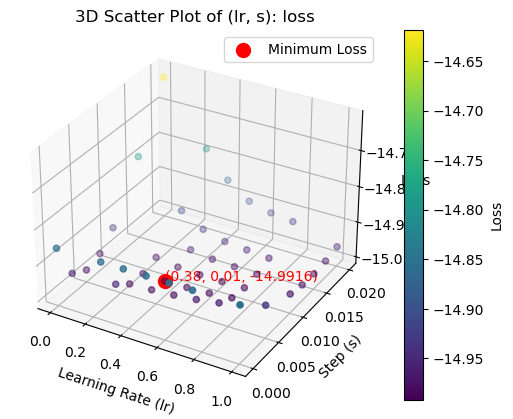

Just finished the selection: better loss -14.991639705452823 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.00750625, and eo_d name = B Field
Executing gci step 1:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.00750625.
--- the report after execution:

The target energy is -15.28
The VQE energy is -14.86 
The DBQA energy is -14.99. 
The difference is for VQE is 0.42 
and for the DBQA 0.28 
which can be compared to the spectral gap 1.09.
The relative difference is 
    - for VQE 2.74% 
    - for DBQA 1.86%.
The energetic fidelity witness of the ground state is: 
    - for the VQE  0.61 
    - for DBQA 0.61
The true fidelity is 
    - for the VQE  0.71
    - for DBQA 0.76
                
The boosting circuit used 90 CNOT gates coming from compiled XXZ evolution and 350 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 35.0 and n_CZ/

In [1]:
from boostvqe.utils import *

outputs = []    
gci_eval_counter = 1
dict_params = []
for nqubits in [10]:
    for nlayers in [7]:
        for seed in [42]:
            for target_epoch in [2000]:
                for eo_d in get_eo_d_initializations(nqubits)[0:1]:
                    mode_dbr_list =[#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            #DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]


                    dict_params.append( dict(
                         nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch,
                        nmb_gci_steps = 1,
                        nmb_gd_epochs = 1,
                        eo_d = eo_d,
                        mode_dbr_list = mode_dbr_list,
                        please_be_verbose = True,
                        please_be_visual = True
                    ))
                    print(gci_eval_counter)
                    gci_eval_counter +=1
                    g, bcd = execute_gci_boost( **dict_params[-1] )
                    outputs.append([bcd,dict_params,g])
                    
                        
                    


In [2]:
outputs[0][1][0]

{'nqubits': 10,
 'nlayers': 7,
 'seed': 42,
 'target_epoch': 2000,
 'nmb_gci_steps': 1,
 'nmb_gd_epochs': 1,
 'eo_d': <boostvqe.models.dbi.double_bracket_evolution_oracles.MagneticFieldEvolutionOracle at 0x7c6bdd36cd10>,
 'mode_dbr_list': [<DoubleBracketRotationType.group_commutator_third_order_reduced: 6>],
 'please_be_verbose': True,
 'please_be_visual': True}

Text(0.5, 1.0, 'Check if the initial and final b_list changed')

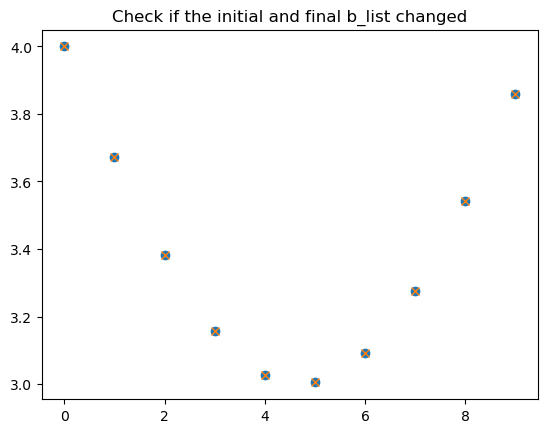

In [3]:
plt.plot(outputs[0][1][0]['eo_d'].b_list,'o')
plt.plot(dict_params[-1]['eo_d'].b_list, 'x')
plt.title('Check if the initial and final b_list changed')